# An Introduction to $\chi^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
%matplotlib inline

In this class, and in science generally, we use measurements to select between theoretical models. So let us assume we made some measurements. Now what? What criterion should we use to prefer one model over another?

A reasonable (but caveat: *incomplete*) position is to choose the model with the highest probability of yielding our measurements. That is, we want the **most likely** model given the data. That is where this tutorial begins.

## Why $\chi^2$?

Suppose we are looking for the likeliest (maximum likelihood) model, given our data.

What determines the likelihood of a model?  This question is hard to answer head-on, so scientists
instead answer a subtly different (but closely related; we'll discuss Bayes' Theorem in a couple of weeks) question: What is the likelihood,
given a model, that we would measure *these* data?

This likelihood, $L$, is the probability 
that each measurement's deviation from the model happened by random chance.  If we assume
Gaussian statistics (a reasonable assumption for a wide range of situations; see the Central Limit Theorem),
we may write the likelihood of the data, $y$, given a model, $f$ as
\begin{equation}
L = \prod_i\frac{1}{\sigma_i\sqrt{2\pi}}
e^{-\left|y_i-f(\mathbf{x}_i, \mathbf{p})\right|^2/2\sigma_i^2}.
\end{equation}
Notice how our model $f$ accepts a set of coordinates $\vec x_i$ describing the configuration used when we
measured $y_i$, as well as a set of parameters $\vec p$ that might be tuned to better fit our data.
Don't worry about the $1/\sigma_i\sqrt{2\pi}$ prefactor; that is just a normalization that ensures probabilities add to one.  The important part is the exponential.

To find the maximum likelihood, we need to maximize $L$, but exponentials are cumbersome. 
Instead, let us maximize $\log L$:
\begin{equation}
\log L = -\frac12\sum_i\frac{\left|y_i-f(\mathbf{x}_i,\mathbf{p})\right|^2}{\sigma_i^2} - \sum_i \log(\sigma_i\sqrt{2\pi})
\end{equation}
The second term (with the $\sigma_i\sqrt{2\pi}$) is a constant that doesn't depend on the model, so we 
will ignore it.  Instead, let us focus on optimizing the first term. To clean things up, we drop the $-\frac12$ factor (so now we are *minimizing*), to get
\begin{equation}
\chi^2=\sum_i{\frac{|y_i-f(\mathbf{x}_i,\mathbf{p})|^2}{\sigma_i^2}}.
\end{equation}

Maximizing $L$ is equivalent to minimizing $\chi^2$.
Moreover, since $L\propto e^{-\frac12\chi^2}$, $\chi^2$ is a measure of the number of "sigmas" (squared) by which the fit deviates from the model.

So to summarize, minimizing $\chi^2$ is equivalent to maximizing the likelihood of a model under the assumption that errors are Gaussian.

# Illustrating Gaussian and $\chi^2$ Distributions

While the Central Limit Theorem states that random variables asymptote to a Gaussian distribution when summed, it is worth mentioning that $\chi^2$ has its own distribution,
\begin{equation}
f(x) = \frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)},
\end{equation}
where $k$ denotes the degrees of freedom (the number of independent variables averaged), and $\Gamma$ is the eponymous gamma function.

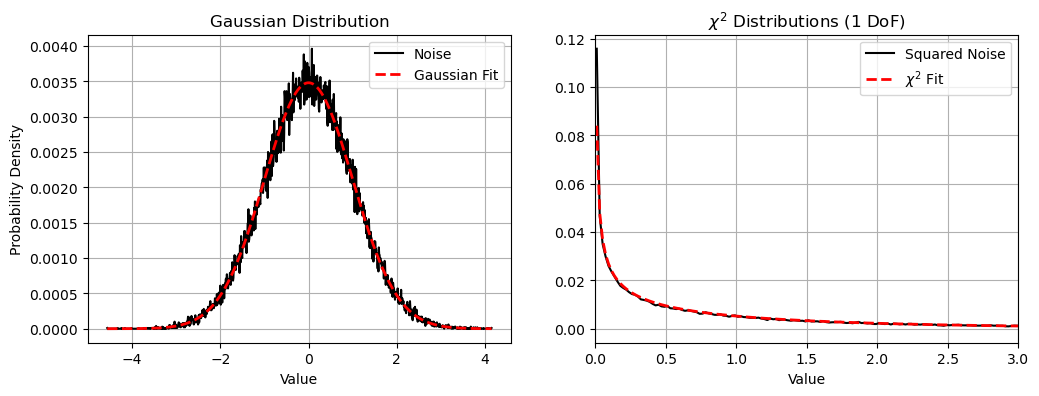

In [2]:
data = np.random.normal(size=100000)
ghist, bins = np.histogram(data, bins=1000)
gx = (bins[:-1] + bins[1:]) / 2
gauss = np.exp(-gx**2 / 2)
chist, bins = np.histogram(np.abs(data)**2, bins=1000)
cx = (bins[:-1] + bins[1:]) / 2
chisq = chi2.pdf(cx, 1)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].plot(gx, ghist / ghist.sum(), 'k', label='Noise')
axes[0].plot(gx, gauss / gauss.sum(), 'r--', linewidth=2, label='Gaussian Fit')
axes[0].set_ylabel('Probability Density')
axes[0].set_xlabel('Value')
axes[0].set_title('Gaussian Distribution')
axes[0].grid()
axes[0].legend()

axes[1].plot(cx, chist / chist.sum(), 'k', label='Squared Noise')
axes[1].plot(cx, chisq / chisq.sum(), 'r--', linewidth=2, label=r'$\chi^2$ Fit')
#for k in range(2,5):
#    cy = chi2.pdf(cx, k)
#    axes[1].plot(cx, cy)
axes[1].set_xlabel('Value')
axes[1].set_title(r'$\chi^2$ Distributions (1 DoF)')
axes[1].grid()
axes[1].set_xlim(0, 3)
_ = axes[1].legend()

## Example: Fitting a Line

Suppose we have a linear function,
\begin{equation}
f(x,m,b)=mx+b,
\end{equation}
that we have measured at various $x_i$'s.  Our measurements are noisy, so for each measurement, $y_i$, 
we get a sample of the function $f(x_i,m,b)$ with added noise, $n_i$:
\begin{equation}
y_i=f(x_i,m,b)+n_i,
\end{equation}
Let us assume the noise is drawn from a Gaussian distribution and each measurement has statistically identical noise with variance $\langle n_i^2\rangle\equiv\sigma^2$. 

In [6]:
def f(x,m,b):
    return m*x+b

xs = np.array([-2, -1, 0, 1, 2], dtype=float)
ys = np.array([-4.0761021 , -0.61376301,  0.96543424,  3.7373177 ,  3.86467818])

So given the measurements, `ys`, at the coordinates specified in `xs`, what is your best guess for ($m$,$b$)?
- (1,1)
- (2,1)
- (1,2)
- (2,2)

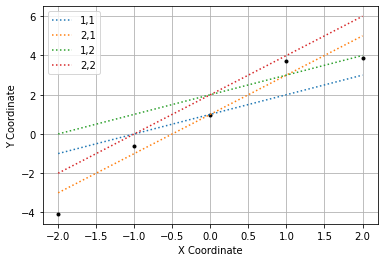

In [10]:
plt.figure()
plt.plot(xs, ys, 'k.')
for m, b in [(1,1), (2,1), (1,2), (2,2)]:
    plt.plot(xs, m * xs + b, ':', label=f'{m},{b}')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()

With a menu of choices, you can directly evaluate $\chi^2$ for each one:
\begin{equation}
\chi^2=\sum_i{\frac{|y_i-f(\vec x_i,\vec p)|^2}{\sigma_i^2}}.
\end{equation}
In the above equation, $i$ indexes different measurements, $\sigma_i$ is the expected error in each measurment, and we have introduced a vector, $\vec p$, that contains the parameters we are fitting.  In the above example, $\vec p = (m, b)$.

In [11]:
def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2 / sig**2)

sig = 1. # Let's assume \sigma_i^2=1 for now
ps = [(1,1), (2,1), (1,2), (2,2)]
X2 = [chisq(ys, f(xs,*p), sig) for p in ps]
print('Chi-Square:', np.around(X2,2))

Chi-Square: [13.61  3.14 20.85 10.39]


So it appears $(m,b)=(2,1)$ is the best answer! Here's what it looks like.

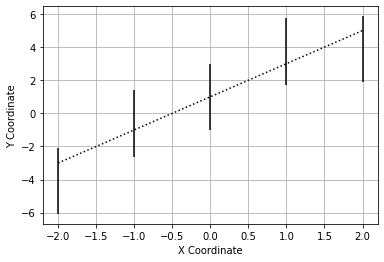

In [12]:
plt.figure()
plt.errorbar(xs,ys,yerr=2, color='k', linestyle='')
plt.plot(xs, 2*xs+1, 'k:')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()

But what happens if we don't have a menu of choices?  Our options are:
- make our own menu (e.g. sample a grid at some resolution), or
- optimize!

It's time to take a trip down the rabbit-hole of optimizing function...which we will cover during the beginning portion of Lab 1.